In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# import lightgbm as lgb
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb
# from sklearn.metrics import r2_score

from statsmodels.formula.api import ols
import statsmodels.api as sm

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import random

In [2]:
pd.set_option('display.max_rows',1000)

In [3]:
train_data = pd.read_csv("train_data.csv", index_col = False, encoding = "utf-8")
test_data = pd.read_csv("test_data.csv", index_col = False, encoding = "utf-8")

In [4]:
# train_data에서 필요없는 컬럼 지우기

del train_data["영화명"]
del train_data["개봉일"]
del train_data["관객수"]
del train_data["매출액"]
del train_data["배우평균"]
del train_data["누적매출액"]
del train_data["대표국적"]
del train_data["배급사"]
del train_data["등급"]
del train_data["장르"]
del train_data["감독"]

In [136]:
# test_data에서 필요없는 컬럼 지우기

del test_data["영화명"]
del test_data["개봉일"]
del test_data["누적매출액"]
del test_data["대표국적"]
del test_data["배급사"]
del test_data["등급"]
del test_data["장르"]
del test_data["감독"]

In [ ]:
test_data = test_data[['누적관객수', '스크린수', '상영횟수', '감독값', '배급사값', '배우합', 'SF', '가족', '공연', '공포',
       '느와르', '다큐멘터리', '드라마', '멜로로맨스', '모험', '무협', '뮤지컬', '미스터리', '범죄', '사극',
       '서부', '서사', '스릴러', '애니메이션', '액션', '어드벤처', '에로', '장르없음', '전쟁', '코미디',
       '판타지', '12세이상관람가', '15세이상관람가', '등급없음', '전체관람가', '청소년관람불가', '평점',
       '평점평가자수', '리뷰평가자수']]

In [90]:
year = pd.read_csv("variable1.csv", index_col = False, encoding = "utf-8", thousands = ",")

,년도,연도별매출액,연도별관객수
0,2004,440728906206,69254626
1,2005,780364979467,123352059
2,2006,892442138000,144256035
3,2007,965486624538,152022992
4,2008,961453297251,147428639
5,2009,1083196004950,155398654
6,2010,1157254738250,147759214
7,2011,1235799464200,159724465
8,2012,1455140354435,194890587
9,2013,1551351984721,213351030


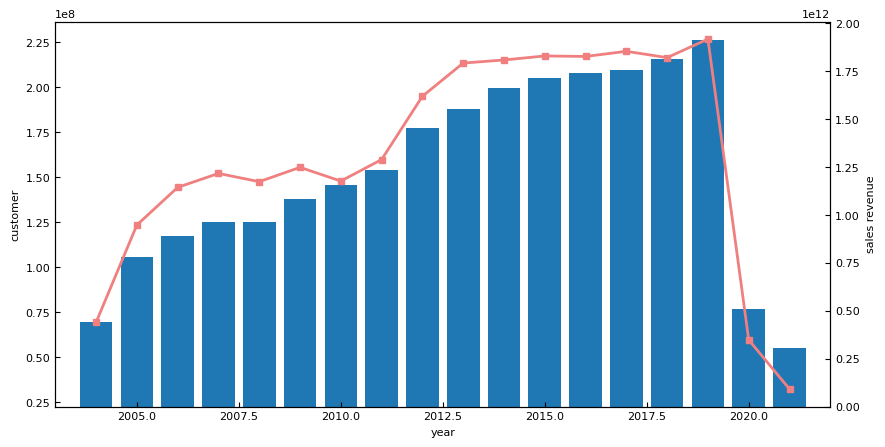

In [129]:
# plt.figure(figsize=(10,10))

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 8

fig, ax1 = plt.subplots()

ax1.plot(year["년도"], year["연도별관객수"], '-s', color='lightcoral', markersize=4, linewidth=2, alpha= 1, label='연도별관객수')
ax1.set_xlim(2003, 2022)
ax1.set_xlabel('year')
ax1.set_ylabel('customer')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(year["년도"], year["연도별매출액"], alpha=1, width=0.8)
ax2.set_ylabel("sales revenue")

ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

plt.show()

## 1. 다중회귀분석

In [118]:
del train_data["영화명"]
del train_data["개봉일"]
del train_data["관객수"]
del train_data["매출액"]
del train_data["배우평균"]
del train_data["누적매출액"]
del train_data["대표국적"]
del train_data["배급사"]
del train_data["등급"]
del train_data["장르"]
del train_data["감독"]

In [119]:
train_data.columns

Index(['누적관객수', '스크린수', '상영횟수', '감독값', '배급사값', '배우합', 'SF', '가족', '공연', '공포',
       '느와르', '다큐멘터리', '드라마', '멜로로맨스', '모험', '무협', '뮤지컬', '미스터리', '범죄', '사극',
       '서부', '서사', '스릴러', '애니메이션', '액션', '어드벤처', '에로', '장르없음', '전쟁', '코미디',
       '판타지', '12세이상관람가', '15세이상관람가', '등급없음', '전체관람가', '청소년관람불가', '별점',
       '별점평가자수', '리뷰평가자수'],
      dtype='object')

In [129]:
# 모든 변수 사용하기
# 코로나의 영향을 반영하기 위해 test_y에 가중치

train_X = train_data.drop(["누적관객수"], axis = 1)
train_y = train_data["누적관객수"]
test_X = test_data.drop(["누적관객수"], axis = 1)
test_y = test_data["누적관객수"] * 2

In [48]:
# 기초통계량 확인
pd.options.display.float_format = '{:.5f}'.format
train_X = train_data[["누적관객수", "스크린수", "상영횟수", "감독값", "배급사값", "배우합", "별점", "별점평가자수", "리뷰평가자수"]] 
train_X.describe(include='all')

,누적관객수,스크린수,상영횟수,감독값,배급사값,배우합,별점,별점평가자수,리뷰평가자수
count,21280.00000,21280.00000,21280.00000,21280.00000,21280.00000,21280.00000,21280.00000,21280.00000,21280.00000
mean,107555.03496,38.14488,1743.70056,43624.21372,95888.54920,353199.37397,2.02153,406.89356,56.09319
std,632621.27180,137.96434,9400.38960,410690.57036,329387.49754,1288223.50557,3.37130,2248.91865,267.92621
min,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,10.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,92.00000,1.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,2280.50000,4.00000,23.00000,1.00000,2870.50000,1619.00000,4.97000,7.00000,3.00000
max,17615686.00000,2835.00000,299334.00000,14411782.00000,7087068.00000,24937893.00000,10.00000,69186.00000,13494.00000


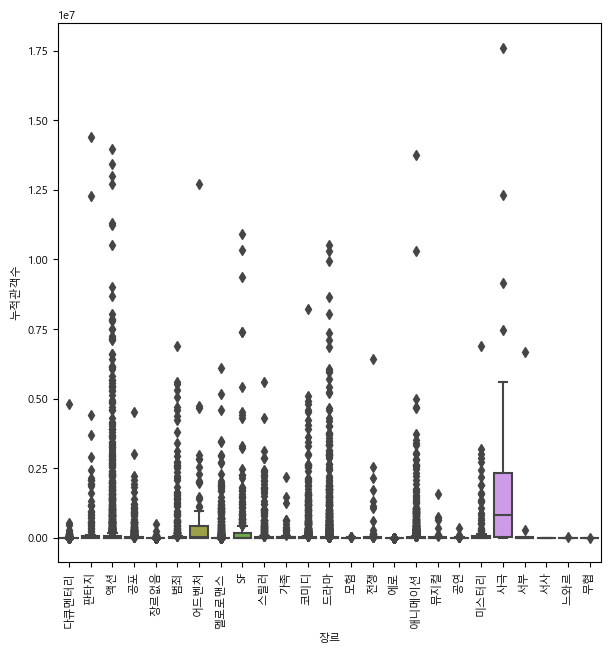

In [147]:
# 장르 box-plot

plt.figure(figsize=(7,7))
sns.boxplot(x = "장르", y = "누적관객수", data = train_data)
plt.xticks(rotation=90)
plt.show()

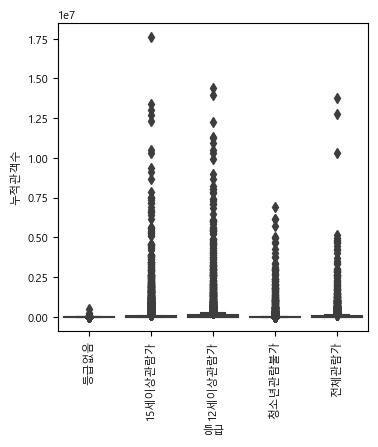

In [150]:
# 등급 box-plot

plt.figure(figsize=(4,4))
sns.boxplot(x = "등급", y = "누적관객수", data = train_data)
plt.xticks(rotation=90)
plt.show()

In [50]:
# 상관관계분석

corr_matrix = train_data.corr()
corr_matrix["누적관객수"].sort_values(ascending=False)

누적관객수       1.000000
별점평가자수      0.753593
리뷰평가자수      0.715826
상영횟수        0.578841
배급사값        0.488374
스크린수        0.460413
감독값         0.434710
배우합         0.422443
별점          0.218257
사극          0.147312
12세이상관람가    0.145916
액션          0.131945
15세이상관람가    0.085436
SF          0.059405
어드벤처        0.049146
판타지         0.047047
범죄          0.043024
전체관람가       0.034543
코미디         0.020329
미스터리        0.019743
스릴러         0.014873
전쟁          0.004007
서부          0.001558
애니메이션      -0.000003
서사         -0.001646
가족         -0.002084
무협         -0.003296
느와르        -0.003443
뮤지컬        -0.003557
공포         -0.008097
모험         -0.010161
드라마        -0.011720
공연         -0.014619
멜로로맨스      -0.029458
에로         -0.050267
다큐멘터리      -0.051941
청소년관람불가    -0.067118
장르없음       -0.070022
등급없음       -0.119195
Name: 누적관객수, dtype: float64

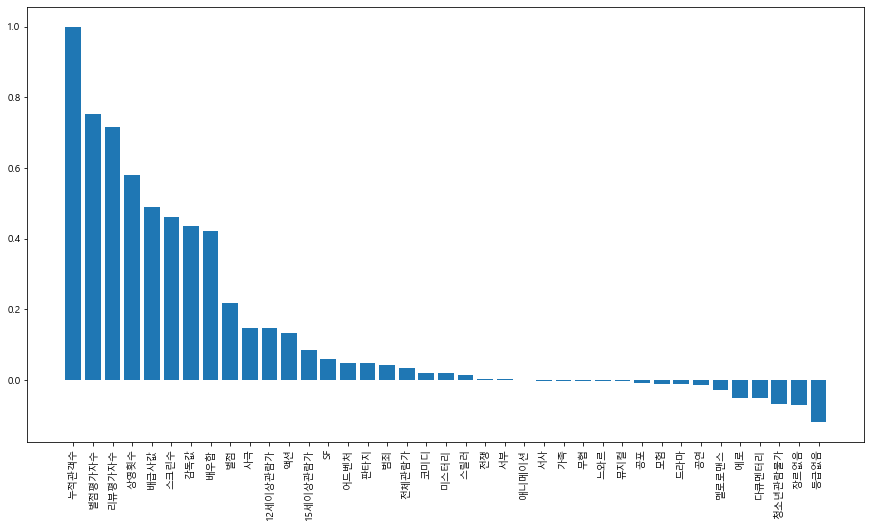

In [88]:
# 상관관계 그래프

corr_df = pd.DataFrame(corr_matrix["누적관객수"].sort_values(ascending=False))

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.bar(corr_df.index, corr_df["누적관객수"])
plt.xticks(rotation=90)

plt.savefig('상관관계.png', transparent = True)

<AxesSubplot:title={'center':'Person Correlation of Features'}>

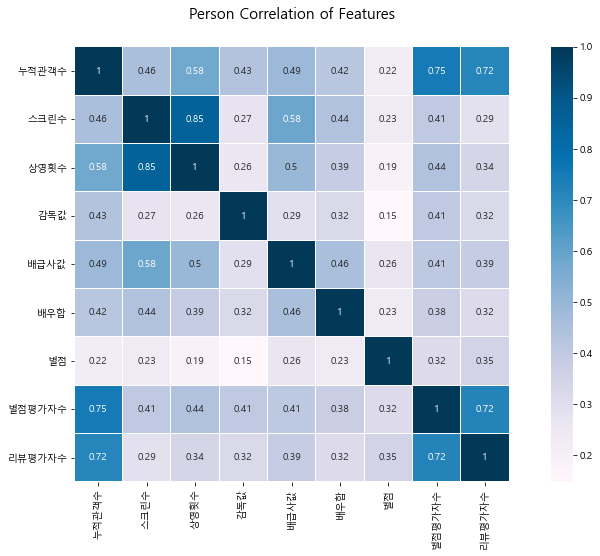

In [76]:
train_X = train_data[["누적관객수", "스크린수", "상영횟수", "감독값", "배급사값", "배우합", "별점", "별점평가자수", "리뷰평가자수"]] 

colormap = plt.cm.PuBu
plt.figure(figsize=(15, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(train_X.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, 
            cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

In [127]:
train_X = train_data[[ '스크린수', '상영횟수', '감독값', '배급사값', '배우합']]
train_y = train_data["누적관객수"]

In [122]:
train_data.columns

Index(['누적관객수', '스크린수', '상영횟수', '감독값', '배급사값', '배우합', 'SF', '가족', '공연', '공포',
       '느와르', '다큐멘터리', '드라마', '멜로로맨스', '모험', '무협', '뮤지컬', '미스터리', '범죄', '사극',
       '서부', '서사', '스릴러', '애니메이션', '액션', '어드벤처', '에로', '장르없음', '전쟁', '코미디',
       '판타지', '12세이상관람가', '15세이상관람가', '등급없음', '전체관람가', '청소년관람불가', '별점',
       '별점평가자수', '리뷰평가자수'],
      dtype='object')

In [130]:
# 회귀분석

train_X = sm.add_constant(train_X, has_constant = "add")

multi_model = sm.OLS(train_y, train_X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  누적관객수   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1705.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:58:23   Log-Likelihood:            -2.9999e+05
No. Observations:               21280   AIC:                         6.001e+05
Df Residuals:                   21243   BIC:                         6.004e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.15e+04   9790.156      4.239      0.000    2.23e+04    6.07e+04
스크린수       -1205.9653     34.196    -35.266      0.000   -1272.993   -1138.938
상영횟수          29.9812      0.468     64.076      0.000      29.064      30.898
감독값            0.1609      0.006     26.700      0.000       0.149       0.173
배급사값           0.2031      0.009     22.673      0.000       0.186       0.221
배우합            0.0322      0.002     15.475      0.000       0.028       0.036
SF         -5.084e+04   2.15e+04     -2.368      0.018   -9.29e+04   -8760.517
가족         -4.915e+04   3.11e+04     -1.579      0.114    -1.1e+05    1.18e+04
공연         -6.735e+04   2.66e+04     -2.529      0.011    -1.2e+05   -1.51e+04
공포         -2.228e+04   1.63e+04     -1.367      0.172   -5.42e+04    9663.512
느와르         1.706e+04   1.03e+05      0.165      0.869   -1.86e+05     2.2e+05
다큐멘터리      -3.945e+04   1.39e+04     -2.847      0.004   -6.66e+04   -1.23e+04
드라마        -3.854e+04   1.24e+04     -3.096      0.002   -6.29e+04   -1.41e+04
멜로로맨스      -1.912e+04   1.38e+04     -1.381      0.167   -4.63e+04    8015.368
모험         -1.219e+04   3.66e+04     -0.333      0.739    -8.4e+04    5.96e+04
무협         -1.858e+04    1.1e+05     -0.169      0.866   -2.34e+05    1.96e+05
뮤지컬        -3.899e+04   3.92e+04     -0.996      0.319   -1.16e+05    3.78e+04
미스터리       -7.038e+04   2.58e+04     -2.723      0.006   -1.21e+05   -1.97e+04
범죄          9088.5492   1.93e+04      0.472      0.637   -2.87e+04    4.68e+04
사극          5.433e+05   4.44e+04     12.234      0.000    4.56e+05     6.3e+05
서부          2.137e+04   4.29e+04      0.499      0.618   -6.26e+04    1.05e+05
서사         -7.456e+04   2.18e+05     -0.341      0.733   -5.03e+05    3.54e+05
스릴러        -3.111e+04   1.81e+04     -1.722      0.085   -6.65e+04    4296.580
애니메이션       1.008e+04    1.4e+04      0.718      0.473   -1.74e+04    3.76e+04
액션          1.695e+04    1.4e+04      1.208      0.227   -1.06e+04    4.45e+04
어드벤처       -4.844e+04   3.28e+04     -1.477      0.140   -1.13e+05    1.58e+04
에로         -1.315e+04   1.47e+04     -0.892      0.373   -4.21e+04    1.58e+04
장르없음       -2.667e+04   1.34e+04     -1.984      0.047    -5.3e+04    -322.069
전쟁          1.606e+04   2.93e+04      0.548      0.583   -4.13e+04    7.34e+04
코미디        -2.735e+04   1.46e+04     -1.869      0.062    -5.6e+04    1340.036
판타지         5.572e+04   2.79e+04      2.001      0.045    1127.761     1.1e+05
12세이상관람가    1.517e+04   6610.149      2.295      0.022    2215.573    2.81e+04
15세이상관람가   -1.056e+04   5481.151     -1.926      0.054   -2.13e+04     185.733
등급없음       -9979.4280   5395.567     -1.850      0.064   -2.06e+04     596.292
전체관람가       7.065e+04   7667.324      9.214      0.000    5.56e+04    8.57e+04
청소년관람불가    -2.378e+04   5752.056     -4.135      0.000   -3.51e+04   -1.25e+04
별점

---
## 2. LinearRegression

In [60]:
# 모든 변수 사용하기
# 코로나의 영향을 반영하기 위해 test_y에 가중치

train_X = train_data.drop(["누적관객수"], axis = 1)
train_y = train_data["누적관객수"]
test_X = test_data.drop(["누적관객수"], axis = 1)
test_y = test_data["누적관객수"] * 2

In [ ]:
# random_state 0 ~ 499번까지 돌리기

a=0
b=0

for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state = i)

    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    
    a += reg_model.score(X_train, y_train)
    b +=  reg_model.score(X_test, y_test)
    
    print("훈련 점수 : ", reg_model.score(X_train, y_train))
    print("테스트 점수 : ", reg_model.score(X_test, y_test))

In [61]:
# 성능이 괜찮은 random_state 돌려보기

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state = 7)

reg_model1 = LinearRegression()
reg_model1.fit(X_train, y_train)

print("훈련 점수 : ", reg_model1.score(X_train, y_train))
print("테스트 점수 : ", reg_model1.score(X_test, y_test))

훈련 점수 :  0.7676187492684813
테스트 점수 :  0.6873060992891427


C:\Users\joong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\joong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


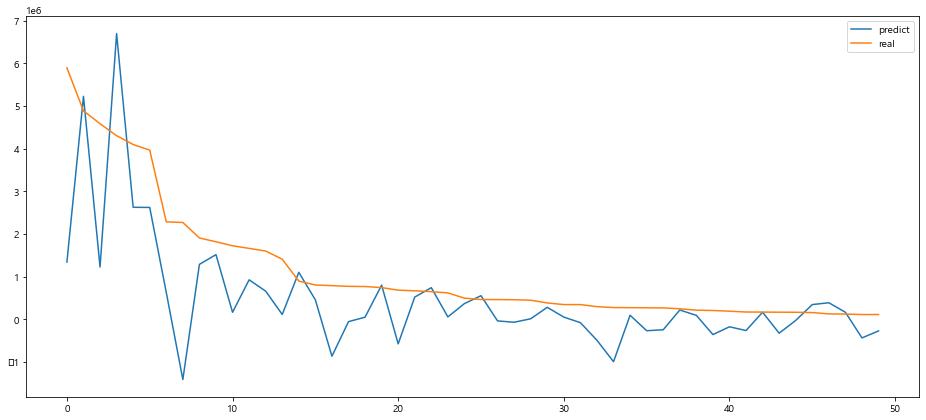

In [65]:
plt.figure(figsize=(16,7))
plt.plot(reg_model1.predict(test_X[:50]), label="predict")
plt.plot(test_y[:50].values.reshape(-1, 1), label="real")
plt.legend()

C:\Users\joong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\joong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


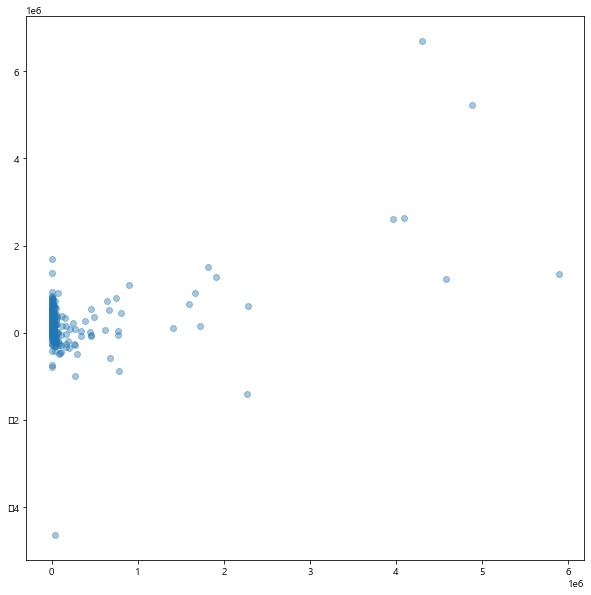

In [81]:
plt.figure(figsize=(10,10))
y_predict = reg_model1.predict(test_X)

plt.scatter(test_y, y_predict, alpha = 0.4)
plt.show()

In [ ]:
# test_y와 pred값 비교와 모델평가

preds = reg_model1.predict(test_X)
preds
test_y = test_y.tolist()
preds = preds.tolist()

In [ ]:
# test_y와 pred값 비교와 모델평가

cnt = 0
for i in range(len(preds)):
    if float(abs(preds[i] - test_y[i]))  < 10000:
        cnt += 1
        
print(cnt / len(test_y))

In [ ]:
for i in range(10):
    print(i, "번째 : ", preds[i], "<-->", test_y[i], " || ", preds[i] - test_y[i])

---
## 3. LGBMRegressor

In [ ]:
# 여러가지 파라미터 돌려보기

model = lgb.LGBMRegressor(random_state=1, n_estimators=1000)

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 2)

params = {'learning_rate': [1, 0.1, 0.01, 0.001, 0.005],
                'min_child_samples': [5, 10, 20]}

lgbm_model = GridSearchCV(estimator = model, param_grid = params,
                          scoring = 'r2', cv = 5, refit = True, verbose = 100)

lgbm_model.fit(X_train, y_train)

print("최적의 파라미터 : ", lgbm_model.best_params_)
print("최고 정확도 : ", lgbm_model.best_score_)
print(lgbm_model.score(X_test, y_test))

In [ ]:
# 가장 성능 좋은 파라미터 돌리기

model = lgb.LGBMRegressor(random_state=1, n_estimators=1000)

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 14)

params = {'learning_rate': [0.005],
                'min_child_samples': [10]}

grid_model1 = GridSearchCV(estimator = model, param_grid = params,
                          scoring = 'r2', cv = 5, refit = True, verbose = 100)

grid_model1.fit(X_train, y_train)

print("최적의 파라미터 : ", grid_model.best_params_)
print("최고 정확도 : ", grid_model.best_score_)
print(grid_model.score(X_test, y_test))

In [ ]:
# test_y와 pred값 비교와 모델평가

preds = grid_model1.predict(test_X)
preds
test_y = test_y.tolist()
preds = preds.tolist()

In [ ]:
# test 데이터 결정계수

r2_score(pred, test_y) 

In [ ]:
# test_y와 pred값 비교와 모델평가

cnt = 0
for i in range(len(preds)):
    if float(abs(preds[i] - test_y[i]))  < 10000:
        cnt += 1
        
print(cnt / len(test_y))

In [ ]:
for i in range(10):
    print(i, "번째 : ", preds[i], "<-->", test_y[i], " || ", preds[i] - test_y[i])

---
## 4. 딥러닝

In [81]:
# train_data = pd.read_csv("train_data.csv", index_col = False, encoding = "utf-8")
# test_data = pd.read_csv("test_data_total.csv", index_col = False, encoding = "utf-8")

In [82]:
# train_data에서 필요없는 컬럼 지우기

# del train_data["영화명"]
# del train_data["개봉일"]
# del train_data["관객수"]
# del train_data["매출액"]
# del train_data["배우평균"]
# del train_data["누적매출액"]
# del train_data["대표국적"]
# del train_data["배급사"]
# del train_data["등급"]
# del train_data["장르"]
# del train_data["감독"]

In [163]:
#bias 추가
 
#상수항 추가 ( 상수항 추가는 한번 더 실행시키면 추가가 더 된다 주의!!)
# train_data = sm.add_constant(train_data,has_constant="add")
# print(train_data.head())

   const  누적관객수  스크린수  상영횟수  감독값  배급사값    배우합  SF  가족  공연  ...  코미디  판타지  \
0    1.0    437     3    17    0     0      0   0   0   0  ...    0    0   
1    1.0     60     1     1    0    40  12875   0   0   0  ...    0    1   
2    1.0     17     5    17    0    27      0   0   0   0  ...    0    0   
3    1.0     60     1     1    0    47      1   0   0   0  ...    0    0   
4    1.0    305     1     2    0     0      0   0   0   0  ...    0    0   

   12세이상관람가  15세이상관람가  등급없음  전체관람가  청소년관람불가   별점  별점평가자수  리뷰평가자수  
0         0         0     1      0        0  0.0       0       0  
1         0         1     0      0        0  0.0       0       0  
2         0         1     0      0        0  0.0       0       0  
3         0         1     0      0        0  0.0       0       0  
4         0         0     1      0        0  0.0       0       0  

[5 rows x 40 columns]


In [64]:
#설명변수(X) ,타겟변수(Y) 분리 및 학습데이터와 평가데이터 분할
 
# featureColums = list(train_data.columns.difference(["누적관객수"]))

# x = train_data[featureColums]
# y = train_data.누적관객수

# featureColums1 = list(test_data.columns.difference(["누적관객수"]))

# x1 = test_data[featureColums1]
# y1 = test_data.누적관객수

# xtest = np.array(test_data[featureColums1], dtype=np.float32)
# ytest = np.array([test_data["누적관객수"]], dtype=np.float32)
 
# trainX ,testX , trainY , testY = train_test_split(x,y,train_size=0.7,test_size=0.3)
# print(trainX.shape,testX.shape,trainY.shape,testY.shape)

In [92]:
# featureColums = list(train_data.columns.difference(["누적관객수"]))

# # x = train_data[featureColums]
# # y = train_data.누적관객수

# xtrain = np.array(train_data[featureColums], dtype=np.float32)
# ytrain = np.array(train_data[["누적관객수"]], dtype=np.float32)

In [115]:
# 사용할 데이터 칼럼 및 xtrain , ytrain


# X = tf.placeholder(tf.float32, shape = [None, 38]) # 행갯수 8, 입력값 갯수 3
# y = tf.placeholder(tf.float32, shape = [None, 1])

# # w, b random 변수 설정 
# import tensorflow as tf

# w = tf.Variable(tf.random_normal([38, 1]))
# b = tf.Variable(tf.random_normal([1]))


# # 가설함수 설정 
# hf = tf.matmul(X, w) + b
# # hf = tf.sigmoid(tf.matmul(X, w + b)

# cost = tf.reduce_mean(tf.square(hf - y)) # (예상값 - 실제값 ) 합의 제곱에 대한 평균 
# # cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
# # cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y))

# train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)


# # # cost , w, b 출력 
# # sess.run(train)
# # print(sess.run(cost), sess.run(w), sess.run(b))

# sess = tf.Session()
# sess.run(tf.global_variables_initializer())

# preds = tf.cast(hf > 0.5, dtype = tf.float32)
# accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, y), dtype = tf.float32))
# print(preds)
# print(accuracy)


# for step in range(1000):
#     _, h, p, a = sess.run([train, hf, preds, accuracy], feed_dict = {X : xtrain, y: ytrain})
    
# print("가설 : ", h)
# print("예측 : ", p)
# print("정확도 : ", a)

# training_epochs = 30
# batch_size = 200

# for epoch in range(training_epochs):
#     total_batch = 20
#     avg_cost = 0
    
#     for i in range(total_batch):
#         c, _ = sess.run([cost, train], feed_dict={X:xtrain, y:ytrain})
#         avg_cost += c/total_batch
    
#     print("epoch:", (epoch+1), "   cost:", avg_cost)

Tensor("Cast_54:0", shape=(?, 1), dtype=float32)
Tensor("Mean_60:0", shape=(), dtype=float32)
가설 :  [[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]
예측 :  [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
정확도 :  0.0


In [41]:
# # 임의의 실린더 값 입력했을 때 예측값 출력 
# for x in xtest:
#     yhat = sess.run(w)[0] * x + sess.run(b)[0]
#     print("X값이 {}일때 예상되는 y값은 {}".format(x,yhat))

X값이 [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 7.011000e+03
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 1.940000e+02 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 3.024611e+06 5.189961e+06 0.000000e+00
 0.000000e+00 1.539140e+05 0.000000e+00 0.000000e+00 0.000000e+00
 2.528000e+03 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 8.500000e+00 7.061000e+03]일때 예상되는 y값은 [1.2610230e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01 2.9609614e+03
 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.2189638e+01 9.3784523e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.2189638e+01 1.2189638e+01 1.2721400e+06 2.1828692e+06 1.2189638e+01
 1.2189638e+01 6.4747219e+04 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.0754468e+03 1.2189638e+01 1.2610230e+01 1.2189638e+01 1.2189638e+01
 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01

X값이 [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.40000e+01
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 7.17860e+04
 3.16037e+05 0.00000e+00 0.00000e+00 2.24800e+03 0.00000e+00 0.00000e+00
 1.00000e+00 1.13000e+02 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 7.66000e+00 1.09000e+02]일때 예상되는 y값은 [1.2189638e+01 1.2610230e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.2189638e+01 1.8077929e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.2189638e+01 1.2189638e+01 3.0204820e+04 1.3293488e+05 1.2189638e+01
 1.2189638e+01 9.5768085e+02 1.2189638e+01 1.2189638e+01 1.2610230e+01
 5.9716553e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.2189638e+01 1.5411374

X값이 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 5.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.5713e+04
 6.3000e+02 0.0000e+00 0.0000e+00 3.5300e+02 0.0000e+00 0.0000e+00
 0.0000e+00 3.0000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 8.1500e+00 2.0000e+01]일때 예상되는 y값은 [  12.189638   12.189638   12.189638   12.189638   12.189638   12.189638
   12.189638   12.189638   12.61023    12.189638   12.189638   14.292599
   12.189638   12.189638   12.189638   12.189638   12.189638 6620.9546
  277.16272    12.189638   12.189638  160.65868    12.189638   12.189638
   12.189638   24.807404   12.189638   12.189638   12.189638   12.189638
   12.189638   12.189638   12.61023    12.189638   12.189638   12.189638
   15.617464   20.601482]
X값이 [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000

X값이 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.   23.    0.    0.
  0.    5.    0.    1.    0.    0.    0.    0.    0.    1.    0.    0.
  9.27 33.  ]일때 예상되는 y값은 [12.189638 12.189638 12.189638 12.189638 12.189638 12.189638 12.189638
 12.189638 12.189638 12.189638 12.189638 12.189638 12.189638 12.189638
 12.189638 12.189638 12.189638 12.189638 12.189638 12.189638 12.189638
 21.863258 12.189638 12.189638 12.189638 14.292599 12.189638 12.61023
 12.189638 12.189638 12.189638 12.189638 12.189638 12.61023  12.189638
 12.189638 16.088528 26.06918 ]
X값이 [0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 7.5034e+04 0.0000e+00 0.0000e+00 1.7000e+01 0.0000e+00 0.0000e+00
 0.0000e+00 5.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00

X값이 [  0.   0.   0.   0.  74.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.  92. 113.   0.   0.   1.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]일때 예상되는 y값은 [12.189638 12.189638 12.189638 12.189638 43.31346  12.189638 12.189638
 12.189638 12.189638 12.189638 12.189638 12.189638 12.61023  12.189638
 12.189638 12.189638 12.189638 50.884117 59.716553 12.189638 12.189638
 12.61023  12.189638 12.189638 12.189638 12.61023  12.189638 12.189638
 12.189638 12.189638 12.189638 12.189638 12.189638 12.61023  12.189638
 12.189638 12.189638 12.189638]
X값이 [  0.   0.   0.   0.  72.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.  80. 218.   0.   0.   1.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]일때 예상되는 y값은 [ 12.189638  12.189638  12.189638  12.189638  42.472275  12.189638
  12.189638  12.189638  12.189638  12.189638  12.189638  12.189638
  12.61023   12.189638  12.189638  12.189638  12.189638  45.8

  12.189638  12.189638]
X값이 [  0.   0.   0.   0.  80.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.  59. 626.   0.   0.   1.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]일때 예상되는 y값은 [ 12.189638  12.189638  12.189638  12.189638  45.837013  12.189638
  12.189638  12.189638  12.189638  12.189638  12.189638  12.189638
  12.61023   12.189638  12.189638  12.189638  12.189638  37.004578
 275.48035   12.189638  12.189638  12.61023   12.189638  12.189638
  12.189638  12.61023   12.189638  12.189638  12.189638  12.189638
  12.189638  12.189638  12.189638  12.61023   12.189638  12.189638
  12.189638  12.189638]
X값이 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.  59. 550.   0.   0.   1.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]일때 예상되는 y값은 [ 12.189638  12.189638  12.189638  12.189638  12.189638  12.189638
  12.189638  12.189638  12.189638  12.189638  12.189638  12.18963

X값이 [0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 1.000000e+00 4.173545e+06 0.000000e+00
 0.000000e+00 1.800000e+01 0.000000e+00 0.000000e+00 0.000000e+00
 5.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00]일때 예상되는 y값은 [1.2189638e+01 1.2610230e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2610230e+01
 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.2189638e+01 1.2189638e+01 1.2610230e+01 1.7553726e+06 1.2189638e+01
 1.2189638e+01 1.9760298e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.4292599e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01
 1.2189638e+01 1.2189638e+01 1.2189638e+01 1.2189638e+01

X값이 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 3. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]일때 예상되는 y값은 [12.189638 12.189638 12.189638 12.189638 12.61023  12.189638 12.189638
 12.189638 12.189638 12.189638 12.189638 12.189638 12.61023  12.189638
 12.189638 12.189638 12.189638 13.451415 12.189638 12.189638 12.189638
 12.61023  12.189638 12.189638 12.189638 12.61023  12.189638 12.189638
 12.189638 12.189638 12.189638 12.189638 12.189638 12.61023  12.189638
 12.189638 12.189638 12.189638]
X값이 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.   3. 550.   0.   0.   1.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]일때 예상되는 y값은 [ 12.189638  12.189638  12.189638  12.189638  12.189638  12.189638
  12.189638  12.189638  12.189638  12.189638  12.189638  12.189638
  12.61023   12.189638  12.189638  12.189638  12.189638  13.451415
 243.51534   12.189638  12.189638  12.61023   12.189638  12.189638
  12

X값이 [  0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  18. 550.   0.   0.   1.   0.   0.   0.   1.   0.   0.
   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.]일때 예상되는 y값은 [ 12.189638  12.189638  12.189638  12.189638  12.61023   12.189638
  12.189638  12.189638  12.189638  12.189638  12.189638  12.189638
  12.189638  12.189638  12.189638  12.189638  12.189638  19.760298
 243.51534   12.189638  12.189638  12.61023   12.189638  12.189638
  12.189638  12.61023   12.189638  12.189638  12.189638  12.61023
  12.189638  12.189638  12.189638  12.61023   12.189638  12.189638
  12.189638  12.189638]
X값이 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 3.1099e+04
 6.2100e+02 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.00

X값이 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 3. 6. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]일때 예상되는 y값은 [12.189638 12.189638 12.189638 12.189638 12.61023  12.189638 12.189638
 12.189638 12.189638 12.189638 12.189638 12.189638 12.61023  12.189638
 12.189638 12.189638 12.189638 13.451415 14.713191 12.189638 12.189638
 12.61023  12.189638 12.189638 12.189638 12.61023  12.189638 12.189638
 12.189638 12.189638 12.189638 12.189638 12.189638 12.61023  12.189638
 12.189638 12.189638 12.189638]
X값이 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  3.
 65.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.]일때 예상되는 y값은 [12.189638 12.189638 12.189638 12.189638 12.61023  12.189638 12.189638
 12.189638 12.189638 12.189638 12.189638 12.189638 12.61023  12.189638
 12.189638 12.189638 12.189638 13.451415 39.52813  12.189638 12.189638
 12.61023  12.189638 12.189638 12.189638 12.61023  12.189638 12.189638
 12.189638 12.189638 12.18

X값이 [  0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.   1. 103.   0.   0.   1.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]일때 예상되는 y값은 [12.189638 12.189638 12.189638 12.189638 12.61023  12.189638 12.189638
 12.189638 12.189638 12.189638 12.189638 12.189638 12.61023  12.189638
 12.189638 12.189638 12.189638 12.61023  55.510635 12.189638 12.189638
 12.61023  12.189638 12.189638 12.189638 12.61023  12.189638 12.189638
 12.189638 12.189638 12.189638 12.189638 12.189638 12.61023  12.189638
 12.189638 12.189638 12.189638]
X값이 [  0.   0.   0.   0.   5.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.  17. 550.   0.   0.   1.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]일때 예상되는 y값은 [ 12.189638  12.189638  12.189638  12.189638  14.292599  12.189638
  12.189638  12.189638  12.189638  12.189638  12.189638  12.189638
  12.61023   12.189638  12.189638  12.189638  12.189638  19.3

  12.189638  12.189638]
X값이 [  0.   0.   0.   0.  24.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.   3. 548.   0.   0.   1.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]일때 예상되는 y값은 [ 12.189638  12.189638  12.189638  12.189638  22.283852  12.189638
  12.189638  12.189638  12.189638  12.189638  12.189638  12.189638
  12.61023   12.189638  12.189638  12.189638  12.189638  13.451415
 242.67415   12.189638  12.189638  12.61023   12.189638  12.189638
  12.189638  12.61023   12.189638  12.189638  12.189638  12.189638
  12.189638  12.189638  12.189638  12.61023   12.189638  12.189638
  12.189638  12.189638]
X값이 [  0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.   3. 620.   0.   0.   1.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]일때 예상되는 y값은 [ 12.189638  12.189638  12.189638  12.189638  12.61023   12.189638
  12.189638  12.189638  12.189638  12.189638  12.189638  12.18963